<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Individual-Coding-Assignment-and-Goals-(Week-5)" data-toc-modified-id="Individual-Coding-Assignment-and-Goals-(Week-5)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Individual Coding Assignment and Goals (Week 5)</a></span><ul class="toc-item"><li><span><a href="#Choropleth-Map-of-Median-Household-Income-by-Zip-Code-in-LA-county" data-toc-modified-id="Choropleth-Map-of-Median-Household-Income-by-Zip-Code-in-LA-county-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Choropleth Map of Median Household Income by Zip Code in LA county</a></span></li><li><span><a href="#Histogram-of-clinics-in-LA-county-by-license,-certification-or-both." data-toc-modified-id="Histogram-of-clinics-in-LA-county-by-license,-certification-or-both.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Histogram of clinics in LA county by license, certification or both.</a></span></li><li><span><a href="#Open-Street-Map-of-the-zip-code-with-high-and-low-median-household-incomes-in-LA-county." data-toc-modified-id="Open-Street-Map-of-the-zip-code-with-high-and-low-median-household-incomes-in-LA-county.-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Open Street Map of the zip code with high and low median household incomes in LA county.</a></span></li><li><span><a href="#Point-Map-of-all-the-licensed-clinics-in-Los-Angeles-county" data-toc-modified-id="Point-Map-of-all-the-licensed-clinics-in-Los-Angeles-county-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Point Map of all the licensed clinics in Los Angeles county</a></span></li><li><span><a href="#Time-Chart-of-the-Center-of-Medicaid-and-Medicare-Services-certification-for-each-clinic" data-toc-modified-id="Time-Chart-of-the-Center-of-Medicaid-and-Medicare-Services-certification-for-each-clinic-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Time Chart of the Center of Medicaid and Medicare Services certification for each clinic</a></span></li></ul></li></ul></div>

## Individual Coding Assignment and Goals (Week 5)

Goals for this assignment:
    * Choropleth Map of Median Household Income by Zip Code in LA county.
    * Histogram of clinics in LA county separated by type of clinic:
        * Licensed and Certified
        * Licensed Only
        * Certified Only
        * Not Licensed / Not Certified
        * Exempt
    * Open Street Map of a high and low median household communities in LA County.
    * LA County point map
    * Time chart of the progression of CMS certification
    
** For the markdown cells, I only specified purpose and outcome once so that it would not be repetitive.

### Choropleth Map of Median Household Income by Zip Code in LA county 

In [1]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
from geopandas import GeoDataFrame

In [2]:
income = gpd.read_file('income.geojson')

Purpose: read the file and add it to a variable

Outcome: the file and the data within are now ready to use

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Purpose: to visualize all rows and columns with no limit

Outcome: can now see the rows and the columns without any constraint.

In [4]:
income = income.drop([0])

Purpose: get rid of the la county row

Outcome: the row is gone and will not affect the output

In [5]:
income.head()

geoid   name  B19013001  B19013001, Error  \
1  86000US90001  90001    43360.0            2437.0   
2  86000US90002  90002    37285.0            1920.0   
3  86000US90003  90003    40598.0            1743.0   
4  86000US90004  90004    49675.0            1784.0   
5  86000US90005  90005    38491.0            2241.0   

                                            geometry  
1  MULTIPOLYGON (((-118.26519 33.98923, -118.2620...  
2  MULTIPOLYGON (((-118.26516 33.94643, -118.2651...  
3  MULTIPOLYGON (((-118.28320 33.98914, -118.2826...  
4  MULTIPOLYGON (((-118.33858 34.08346, -118.3381...  
5  MULTIPOLYGON (((-118.29291 34.06360, -118.2923...

Purpose: Visualize the first 5 rows of the data

Outcome: i can make sure everything looks correct

In [6]:
columns_to_keep = ['geoid',
 'name','B19013001', 'geometry']

Purpose: only keep specific columns

Outcome: only the columns i keep will be used from now on

In [7]:
income.head()

geoid   name  B19013001  B19013001, Error  \
1  86000US90001  90001    43360.0            2437.0   
2  86000US90002  90002    37285.0            1920.0   
3  86000US90003  90003    40598.0            1743.0   
4  86000US90004  90004    49675.0            1784.0   
5  86000US90005  90005    38491.0            2241.0   

                                            geometry  
1  MULTIPOLYGON (((-118.26519 33.98923, -118.2620...  
2  MULTIPOLYGON (((-118.26516 33.94643, -118.2651...  
3  MULTIPOLYGON (((-118.28320 33.98914, -118.2826...  
4  MULTIPOLYGON (((-118.33858 34.08346, -118.3381...  
5  MULTIPOLYGON (((-118.29291 34.06360, -118.2923...

Purpose: Visualize the first 5 rows of the data

Outcome: I can make sure everything looks correct

In [8]:
income = income[columns_to_keep]

In [9]:
income.columns = ['geoid',
 'name',
 'Median Household Income',
 'geometry']

In [10]:
income.shape

(302, 4)

Purpose: see how many items i have on the data

Outcome: I can now get an idea of what kinds of visual i can make with this data

In [11]:
income_gdt = income.sort_values(by='Median Household Income', ascending = False)

Purpose: organize the values by income 

Outcome: the values are now ready to be displayed

Text(0.5, 1.0, 'Median Household income distributed by zip code in LA county in 2019')

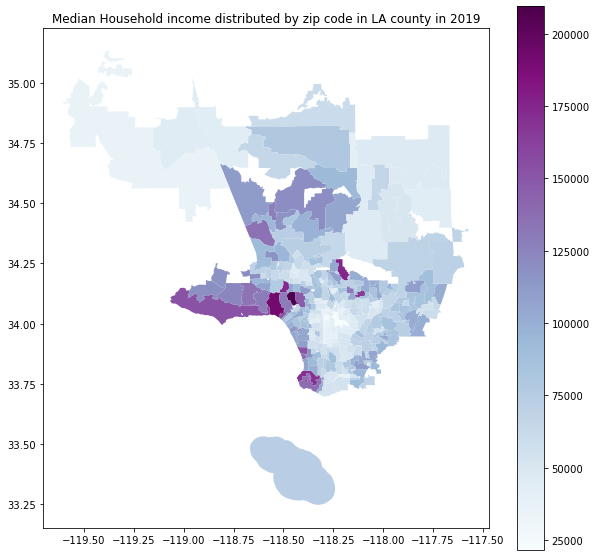

In [12]:
income_gdt.head(302).plot(figsize=(10,10),column='Median Household Income',legend=True, cmap='BuPu', label='Median Household income in US dollar')
plt.title('Median Household income distributed by zip code in LA county in 2019')


Map 1. This LA County choropleth map shows the Median Household Incomes in 2019 Inflation-adjusted dollars by zip code.


The lowest median income per household is found in the Downtown LA area (90021) with a yearly median household income of $ 21,635.

The highest median income per household is found in the Bel Air neighborhood (90077) with a yearly median household income of $ 209,531.

###  Histogram of clinics in LA county by license, certification or both. 

In [13]:
clinic = gpd.read_file('healthcare.csv') 

In [14]:
clinic.head()

LICENSED_CERTIFIED FLAG         T18_19      FACID FAC_STATUS_TYPE_CODE  \
0  LICENSED AND CERTIFIED       T18 OR T18/19  010000001                 OPEN   
1  LICENSED AND CERTIFIED       T18 OR T18/19  010000003                 OPEN   
2  LICENSED AND CERTIFIED       T18 OR T18/19  010000004                 OPEN   
3  LICENSED AND CERTIFIED       T18 OR T18/19  010000005                 OPEN   
4  LICENSED AND CERTIFIED       T18 OR T18/19  010000024                 OPEN   

   ASPEN_FACID     CCN TERMINAT_SW PARTICIPATION_DATE APPROVAL_DATE  \
0  CA010000001  555120                       7-Nov-80     14-Jan-20   
1  CA010000003  056090                       1-Feb-74     13-Nov-19   
2  CA010000004  056296                      14-Sep-71     26-Dec-19   
3  CA010000005  555703                      18-Apr-97     13-Aug-19   
4  CA010000024  056300                      10-Jul-73      6-May-19   

          NPI CAN_BE_DEEMED_FAC_TYPE CAN_BE_CERTIFIED_FAC_TYPE DEEMED  \
0  1235185752                      N                         Y      0   
1  1760496566                      N                         Y      0   
2  1962951715                      N                         Y      0   
3  1255622817                      N                         Y      0   
4  1003113705                      N                         Y      0   

  DEEMD_BY_ID AO_CD DMG_EFCTV_DT AO_TRMNTN_DT AO_NAME  \
0                                                       
1                                                       
2                                                       
3                                                       
4                                                       

                                        FACNAME FAC_TYPE_CODE  \
0                           VINEYARD POST ACUTE           SNF   
1  CREEKSIDE REHABILITATION & BEHAVIORAL HEALTH           SNF   
2                 CRESCENT CITY SKILLED NURSING           SNF   
3               WINDSOR CARE CENTER OF PETALUMA           SNF   
4           GRANADA REHAB & WELLNESS CENTER, LP           SNF   

                    FAC_FDR  LTC CAPACITY           ADDRESS           CITY  \
0  SKILLED NURSING FACILITY  LTC       99     101 MONROE ST       PETALUMA   
1  SKILLED NURSING FACILITY  LTC      181    850 SONOMA AVE     SANTA ROSA   
2  SKILLED NURSING FACILITY  LTC       99  1280 MARSHALL ST  CRESCENT CITY   
3  SKILLED NURSING FACILITY  LTC       79      523 HAYES LN       PETALUMA   
4  SKILLED NURSING FACILITY  LTC       87    2885 HARRIS ST         EUREKA   

     ZIP  ZIP9            FACADMIN                      CONTACT_EMAIL  \
0  94954  2328  SORENSEN, NATHAN P  KEVAN.BILLS@VINEYARDPOSTACUTE.COM   
1  95404  4715     DURANCZYK, PAUL            DATTERBERRY@THEKKEK.COM   
2  95531  2217     PORTER, RENEE G                NIKKITONS@GMAIL.COM   
3  94952  4011        HERBER, ALAN            TMEASE@WINDSORCARES.COM   
4  95503  4808      BRASIER, ALICE   ADMINISTRATOR@GRANADAREHABWC.COM   

      CONTACT_FAX CONTACT_PHONE_NUMBER COUNTY_CODE COUNTY_NAME  \
0  (707) 763-5219       (801) 380-9916         590      SONOMA   
1  (707) 450-0954       (707) 544-7750         590      SONOMA   
2  (707) 464-6064       (707) 464-6151         070   DEL NORTE   
3  (707) 763-4860       (707) 763-2457         590      SONOMA   
4  (707) 441-8446       (707) 443-1627         110    HUMBOLDT   

  DISTRICT_NUMBER DISTRICT_NAME ISFACMAIN PARENT_FACID  \
0              11    SANTA ROSA         Y                
1              11    SANTA ROSA         Y                
2              11    SANTA ROSA         Y                
3              11    SANTA ROSA         Y                
4              11    SANTA ROSA         Y                

  FAC_FAC_RELATIONSHIP_TYPE_CODE START_DATE LICENSE_NUMBER  \
0                         PARENT                 010000102   
1                         PARENT                 010000011   
2                         PARENT                 010000009   
3                 

In [15]:
c_count= clinic['LICENSED_CERTIFIED'].value_counts()
c_count

LICENSED AND CERTIFIED                 7919
LICENSED ONLY                          2908
CERTIFIED ONLY                         1131
NOT LICENSED/NOT CERTIFIED              363
EXEMPT FROM LICENSURE/NOT CERTIFIED       7
Name: LICENSED_CERTIFIED, dtype: int64

Purpose: Count how many values are for each category

Outcome: I now have an idea as to how my data looks

In [55]:
c_count= c_count.reset_index()
c_count

level_0                                index  LICENSED_CERTIFIED
0        0               LICENSED AND CERTIFIED                7919
1        1                        LICENSED ONLY                2908
2        2                       CERTIFIED ONLY                1131
3        3           NOT LICENSED/NOT CERTIFIED                 363
4        4  EXEMPT FROM LICENSURE/NOT CERTIFIED                   7

Purpose: Add an index to the columns so that I can create the chart graph.

Outcome: The data is ready for the chart.

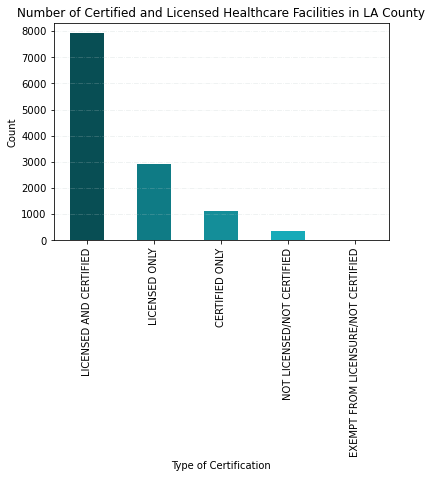

In [17]:
c_count.plot.bar(x='index' , y='LICENSED_CERTIFIED', title="Number of Certified and Licensed Healthcare Facilities in LA County", color= ['#084e54', '#0f7b85', '#148e99', '#16aab8', '#16c8d9'])
plt.grid(color='#b9c9c9', linestyle='-.', linewidth=0.75, axis='y', alpha=0.3)
plt.xlabel('Type of Certification')
plt.ylabel('Count')
plt.legend().remove()

Figure 1. This chart shows a count of the number of certified and licensed healthcare facilities are currently active in LA county. 

### Open Street Map of the zip code with high and low median household incomes in LA county. 

In [18]:
import osmnx as ox
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import folium

Purpose: Import libraries

Outcome: All the libraries and extensions are ready to be used

In [19]:
address = '90048, CA'
tags = {'building':True}
dist = 1000 
address2 = '90021, CA'
tags2 = {'building':True}
dist2 = 1000 

Purpose: add values to the variables that are going to be useful for the maps

Outcome: the variables can now be plugged in to the mapping function

In [20]:
%%time
osm = ox.geometries_from_address(address,
                                 tags=tags,
                                 dist=dist)

CPU times: user 1.49 s, sys: 80.1 ms, total: 1.57 s
Wall time: 13.8 s


Purpose: to cheack how long it takes the cell to run

Outcome: now i know how fast the process is going to go

In [21]:
%%time
osm2 = ox.geometries_from_address(address2,
                                 tags=tags2,
                                 dist=dist2)

CPU times: user 477 ms, sys: 11.5 ms, total: 489 ms
Wall time: 9.69 s


Text(0.5, 1.0, '90048, CA - Open Street Map')

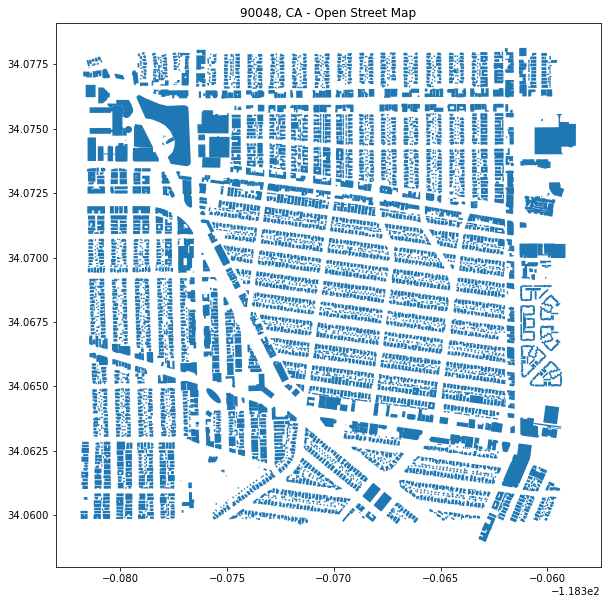

In [59]:
osm.plot(figsize=(10,10))
plt.title('90048, CA - Open Street Map')

Text(0.5, 1.0, '90021, CA - Open Street Map')

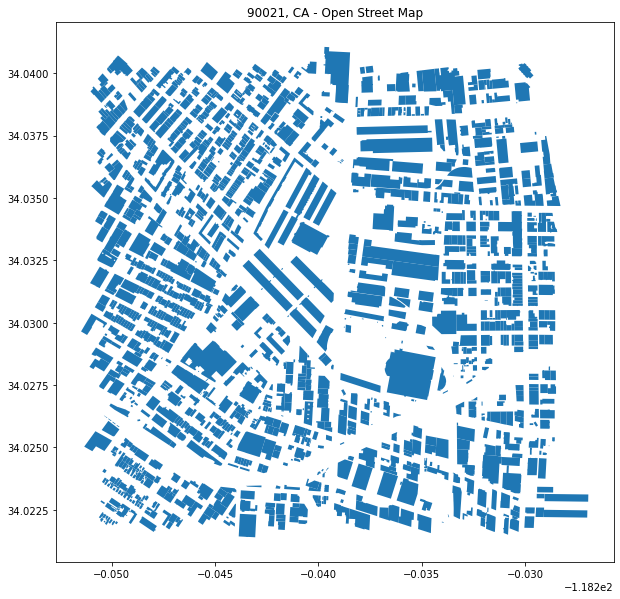

In [60]:
osm2.plot(figsize=(10,10))
plt.title('90021, CA - Open Street Map')

In [24]:
osm.shape

(6037, 60)

In [25]:
osm2.shape

(1531, 54)

In [26]:
type(osm)

geopandas.geodataframe.GeoDataFrame

Purpose: what kind of file is it 
    
Outcome: I know what kind of visualizations i can make

In [27]:
type(osm2)

geopandas.geodataframe.GeoDataFrame

In [28]:
osm.sample(10)

unique_id      osmid element_type amenity  \
2968  way/426020977  426020977          way     NaN   
668   way/391071140  391071140          way     NaN   
458   way/391050539  391050539          way     NaN   
524   way/391060600  391060600          way     NaN   
4684  way/428647050  428647050          way     NaN   
2814  way/426020702  426020702          way     NaN   
3516  way/427129976  427129976          way     NaN   
5924  way/429382786  429382786          way     NaN   
4596  way/428646695  428646695          way     NaN   
1993  way/425376060  425376060          way     NaN   

                                               geometry addr:state  \
2968  POLYGON ((-118.36406 34.06870, -118.36407 34.0...        NaN   
668   POLYGON ((-118.37045 34.07332, -118.37051 34.0...        NaN   
458   POLYGON ((-118.36746 34.07722, -118.36752 34.0...        NaN   
524   POLYGON ((-118.36983 34.07622, -118.36985 34.0...        NaN   
4684  POLYGON ((-118.36914 34.06620, -118.36921 34.0...        NaN   
2814  POLYGON ((-118.36212 34.06800, -118.36210 34.0...        NaN   
3516  POLYGON ((-118.35972 34.06124, -118.35973 34.0...        NaN   
5924  POLYGON ((-118.37806 34.07720, -118.37780 34.0...        NaN   
4596  POLYGON ((-118.36842 34.06665, -118.36847 34.0...        NaN   
1993  POLYGON ((-118.37463 34.06495, -118.37476 34.0...        NaN   

         building   ele gnis:county_name gnis:feature_id gnis:import_uuid  \
2968        house  58.5              NaN             NaN              NaN   
668   residential  54.0              NaN             NaN              NaN   
458         house  60.2              NaN             NaN              NaN   
524    commercial  64.1              NaN             NaN              NaN   
4684        house  49.6              NaN             NaN              NaN   
2814        house  57.3              NaN             NaN              NaN   
3516        house  60.0              NaN             NaN              NaN   
5924   apartments  55.4              NaN             NaN              NaN   
4596        house  51.4              NaN             NaN              NaN   
1993   commercial  57.8              NaN             NaN              NaN   

     gnis:reviewed name source  \
2968           NaN  NaN    NaN   
668            NaN  NaN    NaN   
458            NaN  NaN    NaN   
524            NaN  NaN    NaN   
4684           NaN  NaN    NaN   
2814           NaN  NaN    NaN   
3516           NaN  NaN    NaN   
5924           NaN  NaN    NaN   
4596           NaN  NaN    NaN   
1993           NaN  NaN    NaN   

                                                  nodes building:levels  \
2968  [4253460599, 4253460575, 4253460580, 425346062...             NaN   
668   [3942328373, 3942328374, 3942328392, 394232839...             NaN   
458   [3942104045, 3942104044, 3942104087, 394210408...             NaN   
524   [3942238233, 3942238227, 3942238226, 394223823...             NaN   
4684  [4277387855, 4277387861, 4277388104, 427738810...             NaN   
2814  [4253459614, 4253459799, 4253459791, 425345987...             NaN   
3516  [4263660923, 4263660915, 4263660913, 426366092...             NaN   
5924  [4285062512, 4285062511, 4285062510, 428506250...             NaN   
4596  [4277389093, 4277389099, 4277389119, 427738912...             NaN   
1993  [4247075892, 4247075893, 4247075905, 424707590...             NaN   

     height           lacounty:ain            lacounty:bld_id shop start_date  \
2968    7.4             5510001014               451424847610  NaN       1926   
668     3.6             5511017013               449478849282  NaN       1938   
458     3.5             5514008029               450385850698  NaN       1928   
524    10.8  5514009051;5514009052  449670850415;449701850389  NaN        NaN   
4684    3.9             5510021042               449862846687  NaN       1929   
2814    4.6             5510010030               452031847367  NaN       1928   
3516    9.7      

Purpose: see a random sample of 10 data entries
    
Outcome: i know that the data looks good and is ready to be manipulated

In [29]:
list(osm)

['unique_id',
 'osmid',
 'element_type',
 'amenity',
 'geometry',
 'addr:state',
 'building',
 'ele',
 'gnis:county_name',
 'gnis:feature_id',
 'gnis:import_uuid',
 'gnis:reviewed',
 'name',
 'source',
 'nodes',
 'building:levels',
 'height',
 'lacounty:ain',
 'lacounty:bld_id',
 'shop',
 'start_date',
 'wikidata',
 'addr:city',
 'addr:housenumber',
 'addr:postcode',
 'addr:street',
 'operator',
 'phone',
 'website',
 'emergency',
 'parking',
 'tourism',
 'building:units',
 'office',
 'denomination',
 'religion',
 'access',
 'opening_hours',
 'roof:shape',
 'building:use',
 'name:zh',
 'screen',
 'brand',
 'brand:wikidata',
 'brand:wikipedia',
 'dispensing',
 'healthcare',
 'short_name',
 'fixme',
 'historic',
 'addr:country',
 'email',
 'wikipedia',
 'cuisine',
 'takeaway',
 'club',
 'sport',
 'ways',
 'type',
 'old_name']

Purpose: list all the columns in the data
    
Outcome: I can figure out which columns i want to use

In [30]:
osm.info(verbose=True, null_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 6037 entries, 0 to 6036
Data columns (total 60 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   unique_id         6037 non-null   object  
 1   osmid             6037 non-null   int64   
 2   element_type      6037 non-null   object  
 3   amenity           16 non-null     object  
 4   geometry          6037 non-null   geometry
 5   addr:state        14 non-null     object  
 6   building          6037 non-null   object  
 7   ele               5918 non-null   object  
 8   gnis:county_name  6 non-null      object  
 9   gnis:feature_id   8 non-null      object  
 10  gnis:import_uuid  6 non-null      object  
 11  gnis:reviewed     6 non-null      object  
 12  name              36 non-null     object  
 13  source            17 non-null     object  
 14  nodes             6034 non-null   object  
 15  building:levels   15 non-null     object  
 16  height          

Purpose: see what kind of data each column has
    
Outcome: i can use the columns with the appropriate data

In [31]:
columns_to_keep = ['geometry','building','amenity']
osm = osm[columns_to_keep]
osm.sample(10)

geometry     building amenity
5765  POLYGON ((-118.37056 34.07739, -118.37063 34.0...        house     NaN
3748  POLYGON ((-118.36689 34.06509, -118.36695 34.0...  residential     NaN
3991  POLYGON ((-118.37172 34.06923, -118.37172 34.0...        house     NaN
3424  POLYGON ((-118.36588 34.06091, -118.36589 34.0...        house     NaN
2712  POLYGON ((-118.36519 34.07381, -118.36519 34.0...        house     NaN
1001  POLYGON ((-118.37435 34.07103, -118.37437 34.0...        house     NaN
3549  POLYGON ((-118.36741 34.06538, -118.36744 34.0...  residential     NaN
5986  POLYGON ((-118.38019 34.06037, -118.38019 34.0...        house     NaN
3987  POLYGON ((-118.37233 34.06637, -118.37233 34.0...  residential     NaN
1588  POLYGON ((-118.37865 34.06332, -118.37865 34.0...        house     NaN

In [32]:
osm.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 6037 entries, 0 to 6036
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geometry  6037 non-null   geometry
 1   building  6037 non-null   object  
 2   amenity   16 non-null     object  
dtypes: geometry(1), object(2)
memory usage: 188.7+ KB


Purpose: i can get info about the columns
    
Outcome: i know what kind of data the columns contain

In [33]:
osm.building.value_counts()

house          3424
residential    1292
apartments      625
commercial      226
retail          206
yes             200
hotel            20
garage           13
hospital         12
garages           8
industrial        5
office            2
warehouse         1
school            1
roof              1
parking           1
Name: building, dtype: int64

Purpose: count how many items of each category i have in the data
    
Outcome: i know what categories have the largest numbers

In [34]:
osm2.building.value_counts()

industrial      540
warehouse       477
yes             133
retail          114
commercial      103
factory          47
house            35
apartments       31
residential      29
school           15
hotel             2
parking           2
roof              1
kindergarten      1
college           1
Name: building, dtype: int64

In [35]:
osm.loc[osm['building']=='house','building'] = 'living facility'
osm.loc[osm['building']=='yes','building'] = 'living facility'
osm.loc[osm['building']=='hotel','building'] = 'living facility'
osm.loc[osm['building']=='residential','building'] = 'living facility'
osm.loc[osm['building']=='apartments','building'] = 'living facility'
osm.loc[osm['building']=='residential','building'] = 'living facility'
osm.loc[osm['building']=='garage','building'] = 'garage'
osm.loc[osm['building']=='garages','building'] = 'garage'
osm.loc[osm['building']=='parking','building'] = 'garage'

Purpose: I want to categorize certain buildings into an umbrella category
    
Outcome: my visualization will now come out cleaner

In [36]:
osm2.loc[osm2['building']=='house','building'] = 'living facility'
osm2.loc[osm2['building']=='yes','building'] = 'living facility'
osm2.loc[osm2['building']=='hotel','building'] = 'living facility'
osm2.loc[osm2['building']=='residential','building'] = 'living facility'
osm2.loc[osm2['building']=='apartments','building'] = 'living facility'
osm2.loc[osm2['building']=='residential','building'] = 'living facility'
osm2.loc[osm2['building']=='school','building'] = 'educational facility'
osm2.loc[osm2['building']=='kindergarten','building'] = 'educational facility'
osm2.loc[osm2['building']=='college','building'] = 'educational facility'
osm2.loc[osm2['building']=='warehouse','building'] = 'work facility'
osm2.loc[osm2['building']=='factory','building'] = 'work facility'
osm2.loc[osm2['building']=='industrial','building'] = 'work facility'

In [37]:
osm.building.value_counts()

living facility    5561
commercial          226
retail              206
garage               22
hospital             12
industrial            5
office                2
warehouse             1
school                1
roof                  1
Name: building, dtype: int64

In [38]:
osm2.building.value_counts()

work facility           1064
living facility          230
retail                   114
commercial               103
educational facility      17
parking                    2
roof                       1
Name: building, dtype: int64

Text(0.5, 1.0, 'Open Street Map - 90021 (Median Household Income: $21,365)')

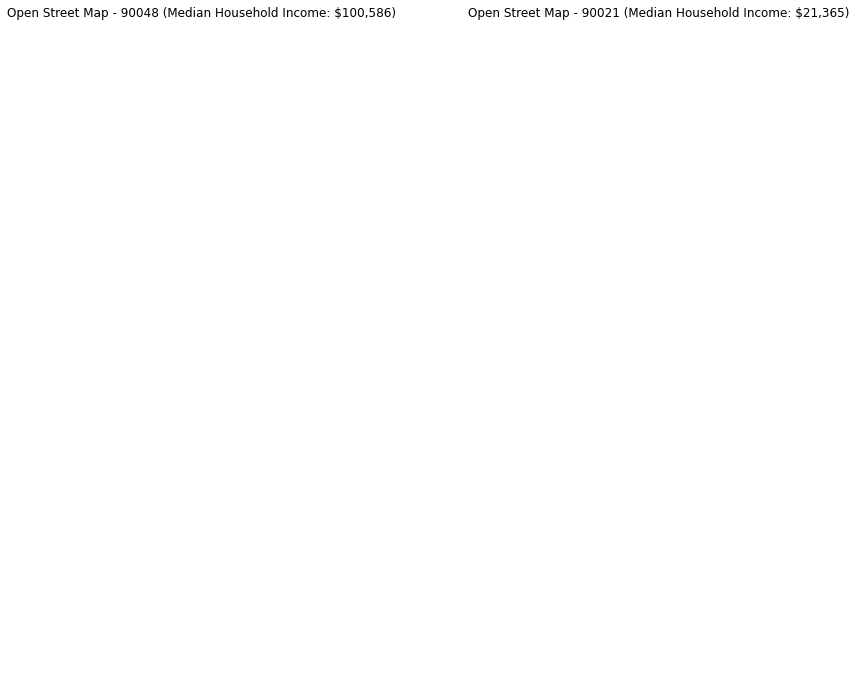

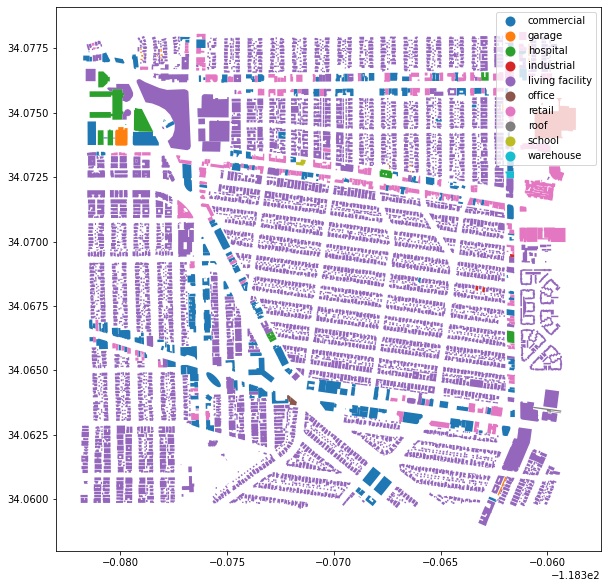

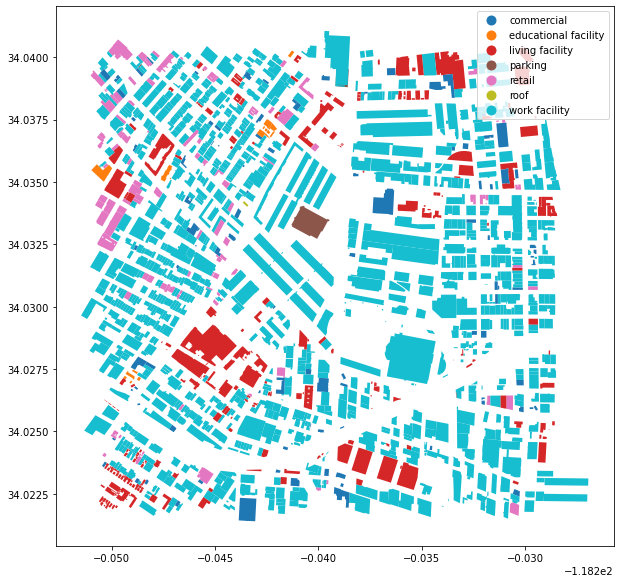

In [39]:
fig, axs = plt.subplots(1, 2, figsize=(15, 12))
ax1, ax2 = axs
osm.plot(figsize=(10,10), column='building',
         cmap='tab10',
         legend=True)

ax1.axis("off")
ax1.set_title("Open Street Map - 90048 (Median Household Income: $100,586)")

osm2.plot(figsize=(10,10), column='building',
         cmap='tab10',
         legend=True)
ax2.axis("off")
ax2.set_title("Open Street Map - 90021 (Median Household Income: $21,365)")

Map 2. In these Open Street Maps, the zip codes and buildings located within an area around these.

The top map is of the 90048 zip code area and has a total of 12 hospitals and a median household income of $100,586. 

The bottom map is of the 90021 zip code area and has a total of 0 hospital and a median household income of $21,375.

### Point Map of all the licensed clinics in Los Angeles county

In [43]:
import folium
import pandas as pd
import json
from folium import plugins

df = pd.read_csv('flac.csv')

with open('income.geojson') as f:
    laArea = json.load(f)

In [44]:
clc = pd.read_csv('healthcare.csv')

In [45]:
clc["LONGITUDE"] = clc["LONGITUDE"].astype(float)
longitude = clc.LONGITUDE.mean()
longitude

-119.21245274892944

Purpose: calculate longitude
    
Outcome: i can now use this measurement for the map

In [46]:
clc["LATITUDE"] = clc["LATITUDE"].astype(float)
latitude = clc.LATITUDE.mean()
latitude

35.28276292443222

Purpose: calculate latitude
    
Outcome: i can now use this measurement for the map

In [47]:
laMap = folium.Map(location=[latitude,longitude], tiles='Stamen Toner', zoom_start=10)

for i,row in df.iterrows():
    folium.CircleMarker((row.LATITUDE,row.LONGITUDE), radius=0.75, weight=3, color='red', fill_opacity=.1).add_to(laMap)

Purpose: create a folium map with all the data and save it to a variable
    
Outcome: the folium map is saved into a variable and can be called

In [48]:
laMap

Map 2. This point map shows the location of all healthcare facilities within the LA County. Each dot represents one facility that offers various different services to the community. Some areas, inlcuding Van Nuys and Sherman Oaks are densely packed with availaible services. Other areas, including Hollywood and marina del Rey have less clinics in their communities.

### Time Chart of the Center of Medicaid and Medicare Services certification for each clinic

In [49]:
time_data = pd.read_csv('timedata1.csv')

In [50]:
time_data = time_data['PARTICIPATION_DATE'].value_counts().reset_index()
time_data

index  PARTICIPATION_DATE
0   2019.0                 262
1   2018.0                 195
2   2016.0                 159
3   2017.0                 152
4   2020.0                 146
5   2014.0                 139
6   2015.0                 132
7   2012.0                 112
8   2013.0                 107
9   2009.0                  98
10  2011.0                  97
11  2010.0                  96
12  2008.0                  90
13  2004.0                  81
14  2007.0                  79
15  2003.0                  71
16  1966.0                  70
17  2002.0                  57
18  1996.0                  55
19  1997.0                  52
20  1995.0                  50
21  1999.0                  48
22  1967.0                  47
23  2001.0                  46
24  1998.0                  44
25  2006.0                  42
26  1994.0                  40
27  2005.0                  37
28  1991.0                  34
29  1989.0                  29
30  1993.0                  26
31  1979.0                  25
32  1976.0                  24
33  1985.0                  24
34  1971.0                  23
35  1973.0                  22
36  1990.0                  22
37  1978.0                  22
38  2000.0                  22
39  1977.0                  22
40  1987.0                  20
41  1970.0                  20
42  1992.0                  20
43  1974.0                  20
44  1972.0                  18
45  1980.0                  18
46  1986.0                  18
47  1969.0                  18
48  1968.0                  17
49  1983.0                  15
50  1984.0                  10
51  1988.0                  10
52  1975.0                   9
53  1981.0                   5
54  1982.0                   3

In [51]:
time_data = time_data.rename(columns={'index':'year','PARTICIPATION_DATE':'count'})
time_data

year  count
0   2019.0    262
1   2018.0    195
2   2016.0    159
3   2017.0    152
4   2020.0    146
5   2014.0    139
6   2015.0    132
7   2012.0    112
8   2013.0    107
9   2009.0     98
10  2011.0     97
11  2010.0     96
12  2008.0     90
13  2004.0     81
14  2007.0     79
15  2003.0     71
16  1966.0     70
17  2002.0     57
18  1996.0     55
19  1997.0     52
20  1995.0     50
21  1999.0     48
22  1967.0     47
23  2001.0     46
24  1998.0     44
25  2006.0     42
26  1994.0     40
27  2005.0     37
28  1991.0     34
29  1989.0     29
30  1993.0     26
31  1979.0     25
32  1976.0     24
33  1985.0     24
34  1971.0     23
35  1973.0     22
36  1990.0     22
37  1978.0     22
38  2000.0     22
39  1977.0     22
40  1987.0     20
41  1970.0     20
42  1992.0     20
43  1974.0     20
44  1972.0     18
45  1980.0     18
46  1986.0     18
47  1969.0     18
48  1968.0     17
49  1983.0     15
50  1984.0     10
51  1988.0     10
52  1975.0      9
53  1981.0      5
54  1982.0      3

Purpose:  rename columns
    
Outcome: the columns now can be called by their new names

In [52]:
time_data = time_data.sort_values(by='year')

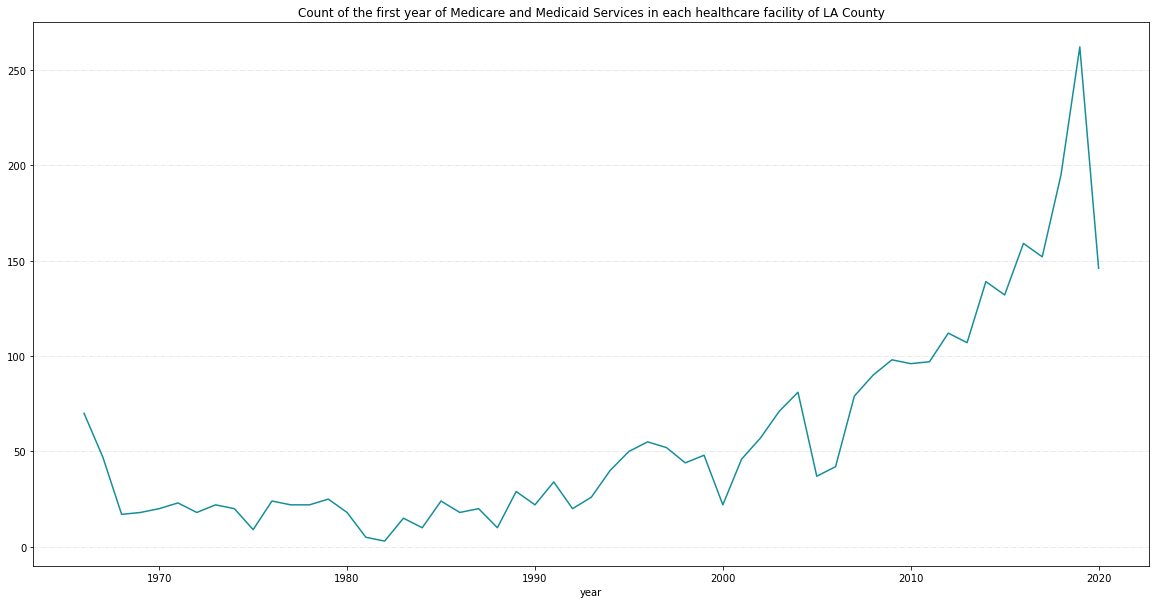

In [53]:
time_data.plot(figsize=(20,10), x='year', title='Count of the first year of Medicare and Medicaid Services in each healthcare facility of LA County', color='#148e99')
plt.legend().remove()
plt.grid(color='#b9c9c9', linestyle='-.', linewidth=0.75, axis='y', alpha=0.5)

Figure 2. This figure shows a timeline of the years in which each facility in LA County started participating in Center for Medicaid and Medicare Services. There is a very high spike in the participation count during the 2019 year with 262 facilities participating in CMS.